# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

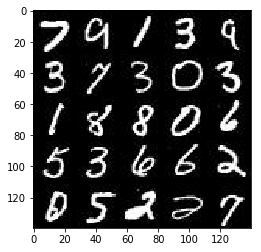

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

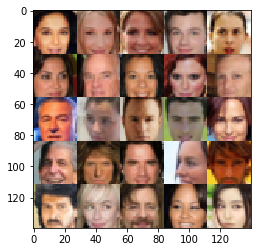

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input = tf.placeholder(tf.float32,[None,image_width,image_height,image_channels],name='real_input')
    z_input = tf.placeholder(tf.float32,[None,z_dim],name='z_input')
    learn_rate = tf.placeholder(tf.float32,name='learn_rate')

    return real_input,z_input,learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha=0.05
    
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        drop_x1 = tf.nn.dropout(relu1, keep_prob = 0.7)
        
        x2 = tf.layers.conv2d(drop_x1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=1, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        x4 = tf.layers.conv2d(relu3, 512, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        
        #x5 = tf.layers.conv2d(drop_x4, 1024, 5, strides=2, padding='same',
                              #kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        #bn5 = tf.layers.batch_normalization(x5, training=True)
        #relu5 = tf.maximum(alpha * bn5, bn5)
        #drop_x5 = tf.nn.dropout(relu5, keep_prob = 0.7)

        flat = tf.reshape(relu4, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.05
    
    with tf.variable_scope('generator',reuse=not is_train):
        x1 = tf.layers.dense(z,7*7*512)
        x1 = tf.reshape(x1,(-1,7,7,512))
        x1 = tf.layers.dropout(x1, 0.7, training = True)
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1,x1)
        
        x1_2 = tf.layers.conv2d_transpose(x1,512,5,strides=1,padding='same')
        x1_2 = tf.layers.batch_normalization(x1_2,training=is_train)
        x1_2 = tf.maximum(alpha * x1_2,x1_2)
        
        x2 = tf.layers.conv2d_transpose(x1_2,256,5,strides=1,padding='same')
        x2 = tf.layers.dropout(x2, 0.7, training = True)
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = tf.maximum(alpha * x2,x2)
        
        #x2_3 = tf.layers.conv2d_transpose(x2,256,4,strides=1,padding='same',
                                        #kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True, seed=None, dtype=tf.float32))
        #x2_3 = tf.layers.dropout(x2_3, 0.7, training = True)
        #x2_3 = tf.layers.batch_normalization(x2_3,training=is_train)
        #x2_3 = tf.maximum(alpha * x2_3,x2_3)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = tf. maximum(alpha * x3,x3)
        
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,4,strides=2,padding='same')
        
        out = tf.tanh(logits)
        
    return out
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    image_width = data_shape[1]
    
    image_height = data_shape[2]
    
    image_channels = data_shape[3]
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    tot_batches = data_shape[0] // batch_size
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps+=1
                batch_images = batch_images*2

                # Sample random noise for generator
                batch_z = np.random.uniform(-1,1, size = (batch_size, z_dim))

                # Run Optimizers
                #_ = sess.run(d_opt, feed_dict = {input_real: batch_images, input_z: batch_z,lr:learning_rate})
                #_ = sess.run(g_opt, feed_dict = {input_z: batch_z, lr:learning_rate, input_real:batch_images})
                #_ = sess.run(g_opt, feed_dict = {input_z: batch_z, lr:learning_rate, input_real:batch_images})
                _ = sess.run(d_opt, feed_dict={input_real:batch_images, input_z:batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real:batch_images, input_z:batch_z, lr:learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_real:batch_images, input_z:batch_z, lr:learning_rate})

                if steps % 100 == 0:
                    _ = show_generator_output(sess,40,input_z,data_shape[3],data_image_mode)

                if steps % 10 == 0:

                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),"Batch: {}".format(steps),
                         "Discriminator Loss: {:.4f}...".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    #_ = show_generator_output(sess,1,input_z,data_shape[3],data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch: 10 Discriminator Loss: 1.2350... Generator Loss: 9.7397
Epoch 1/1... Batch: 20 Discriminator Loss: 2.4302... Generator Loss: 0.2530
Epoch 1/1... Batch: 30 Discriminator Loss: 0.7716... Generator Loss: 2.1952
Epoch 1/1... Batch: 40 Discriminator Loss: 1.2384... Generator Loss: 1.2391
Epoch 1/1... Batch: 50 Discriminator Loss: 0.9763... Generator Loss: 1.3812
Epoch 1/1... Batch: 60 Discriminator Loss: 1.4293... Generator Loss: 2.6917
Epoch 1/1... Batch: 70 Discriminator Loss: 1.3505... Generator Loss: 4.9364
Epoch 1/1... Batch: 80 Discriminator Loss: 2.1614... Generator Loss: 5.4458
Epoch 1/1... Batch: 90 Discriminator Loss: 0.7765... Generator Loss: 2.7670


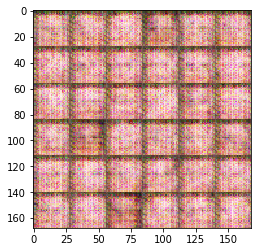

Epoch 1/1... Batch: 100 Discriminator Loss: 1.3200... Generator Loss: 0.8558
Epoch 1/1... Batch: 110 Discriminator Loss: 1.2551... Generator Loss: 0.6803
Epoch 1/1... Batch: 120 Discriminator Loss: 0.8316... Generator Loss: 1.5251
Epoch 1/1... Batch: 130 Discriminator Loss: 0.7437... Generator Loss: 1.4415
Epoch 1/1... Batch: 140 Discriminator Loss: 1.2842... Generator Loss: 1.7286
Epoch 1/1... Batch: 150 Discriminator Loss: 1.0190... Generator Loss: 1.0633
Epoch 1/1... Batch: 160 Discriminator Loss: 0.9541... Generator Loss: 2.3041
Epoch 1/1... Batch: 170 Discriminator Loss: 0.9820... Generator Loss: 1.1282
Epoch 1/1... Batch: 180 Discriminator Loss: 1.1466... Generator Loss: 1.0861
Epoch 1/1... Batch: 190 Discriminator Loss: 1.1191... Generator Loss: 1.7393


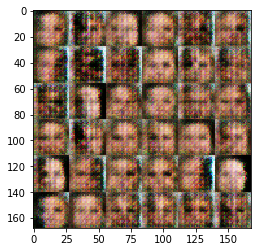

Epoch 1/1... Batch: 200 Discriminator Loss: 1.2347... Generator Loss: 0.6762
Epoch 1/1... Batch: 210 Discriminator Loss: 0.7634... Generator Loss: 2.5530
Epoch 1/1... Batch: 220 Discriminator Loss: 0.7813... Generator Loss: 2.5528
Epoch 1/1... Batch: 230 Discriminator Loss: 2.0572... Generator Loss: 0.3451
Epoch 1/1... Batch: 240 Discriminator Loss: 1.0413... Generator Loss: 1.7616
Epoch 1/1... Batch: 250 Discriminator Loss: 1.6433... Generator Loss: 0.6522
Epoch 1/1... Batch: 260 Discriminator Loss: 0.6817... Generator Loss: 1.9397
Epoch 1/1... Batch: 270 Discriminator Loss: 1.4277... Generator Loss: 0.5721
Epoch 1/1... Batch: 280 Discriminator Loss: 1.7314... Generator Loss: 0.3162
Epoch 1/1... Batch: 290 Discriminator Loss: 0.9233... Generator Loss: 2.0321


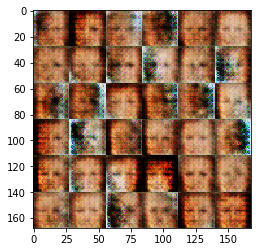

Epoch 1/1... Batch: 300 Discriminator Loss: 0.6566... Generator Loss: 1.8325
Epoch 1/1... Batch: 310 Discriminator Loss: 0.7951... Generator Loss: 3.7539
Epoch 1/1... Batch: 320 Discriminator Loss: 0.8116... Generator Loss: 1.2656
Epoch 1/1... Batch: 330 Discriminator Loss: 1.0339... Generator Loss: 1.3626
Epoch 1/1... Batch: 340 Discriminator Loss: 1.0859... Generator Loss: 2.3634
Epoch 1/1... Batch: 350 Discriminator Loss: 0.8986... Generator Loss: 1.9664
Epoch 1/1... Batch: 360 Discriminator Loss: 0.7802... Generator Loss: 1.7203
Epoch 1/1... Batch: 370 Discriminator Loss: 1.0859... Generator Loss: 0.9554
Epoch 1/1... Batch: 380 Discriminator Loss: 0.8616... Generator Loss: 1.3635
Epoch 1/1... Batch: 390 Discriminator Loss: 0.8503... Generator Loss: 1.8046


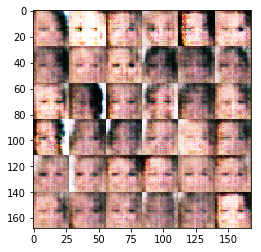

Epoch 1/1... Batch: 400 Discriminator Loss: 0.8400... Generator Loss: 1.7867
Epoch 1/1... Batch: 410 Discriminator Loss: 1.1596... Generator Loss: 1.7327
Epoch 1/1... Batch: 420 Discriminator Loss: 0.7464... Generator Loss: 1.6517
Epoch 1/1... Batch: 430 Discriminator Loss: 0.8383... Generator Loss: 3.3296
Epoch 1/1... Batch: 440 Discriminator Loss: 1.3773... Generator Loss: 0.6014
Epoch 1/1... Batch: 450 Discriminator Loss: 0.8173... Generator Loss: 1.3919
Epoch 1/1... Batch: 460 Discriminator Loss: 1.0570... Generator Loss: 1.2127
Epoch 1/1... Batch: 470 Discriminator Loss: 1.2801... Generator Loss: 2.3875
Epoch 1/1... Batch: 480 Discriminator Loss: 1.0685... Generator Loss: 1.9220
Epoch 1/1... Batch: 490 Discriminator Loss: 0.8826... Generator Loss: 1.4891


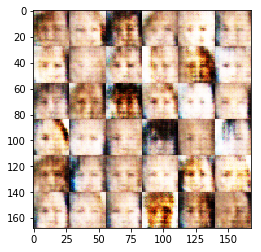

Epoch 1/1... Batch: 500 Discriminator Loss: 0.8178... Generator Loss: 2.0997
Epoch 1/1... Batch: 510 Discriminator Loss: 0.7495... Generator Loss: 1.5967
Epoch 1/1... Batch: 520 Discriminator Loss: 0.8085... Generator Loss: 1.3315
Epoch 1/1... Batch: 530 Discriminator Loss: 0.8480... Generator Loss: 1.7573
Epoch 1/1... Batch: 540 Discriminator Loss: 0.7499... Generator Loss: 1.7428
Epoch 1/1... Batch: 550 Discriminator Loss: 0.9010... Generator Loss: 1.2581
Epoch 1/1... Batch: 560 Discriminator Loss: 1.0548... Generator Loss: 0.9299
Epoch 1/1... Batch: 570 Discriminator Loss: 1.7543... Generator Loss: 0.4451
Epoch 1/1... Batch: 580 Discriminator Loss: 0.9256... Generator Loss: 1.3163
Epoch 1/1... Batch: 590 Discriminator Loss: 0.7578... Generator Loss: 1.5247


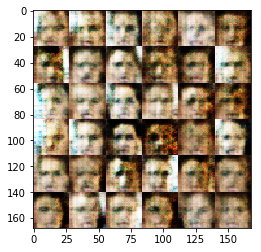

Epoch 1/1... Batch: 600 Discriminator Loss: 0.8823... Generator Loss: 1.3051
Epoch 1/1... Batch: 610 Discriminator Loss: 0.8815... Generator Loss: 1.0756
Epoch 1/1... Batch: 620 Discriminator Loss: 0.8914... Generator Loss: 1.4442
Epoch 1/1... Batch: 630 Discriminator Loss: 0.6728... Generator Loss: 1.7566
Epoch 1/1... Batch: 640 Discriminator Loss: 1.1871... Generator Loss: 3.2389
Epoch 1/1... Batch: 650 Discriminator Loss: 0.7537... Generator Loss: 1.3464
Epoch 1/1... Batch: 660 Discriminator Loss: 1.0894... Generator Loss: 0.9805
Epoch 1/1... Batch: 670 Discriminator Loss: 0.6498... Generator Loss: 2.9125
Epoch 1/1... Batch: 680 Discriminator Loss: 0.7701... Generator Loss: 1.8658
Epoch 1/1... Batch: 690 Discriminator Loss: 0.8757... Generator Loss: 1.2016


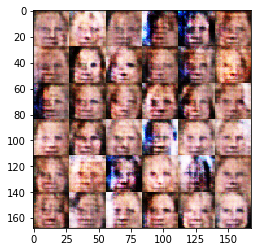

Epoch 1/1... Batch: 700 Discriminator Loss: 0.6989... Generator Loss: 1.5981
Epoch 1/1... Batch: 710 Discriminator Loss: 1.0927... Generator Loss: 2.6919
Epoch 1/1... Batch: 720 Discriminator Loss: 1.1135... Generator Loss: 1.0877
Epoch 1/1... Batch: 730 Discriminator Loss: 0.9806... Generator Loss: 1.2324
Epoch 1/1... Batch: 740 Discriminator Loss: 0.9320... Generator Loss: 1.9185
Epoch 1/1... Batch: 750 Discriminator Loss: 0.8566... Generator Loss: 1.8850
Epoch 1/1... Batch: 760 Discriminator Loss: 0.8724... Generator Loss: 1.6972
Epoch 1/1... Batch: 770 Discriminator Loss: 0.6058... Generator Loss: 2.1569
Epoch 1/1... Batch: 780 Discriminator Loss: 0.9883... Generator Loss: 1.4112
Epoch 1/1... Batch: 790 Discriminator Loss: 0.6788... Generator Loss: 1.7019


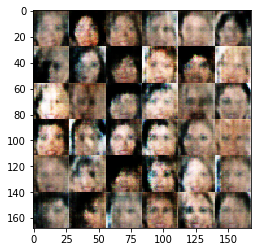

Epoch 1/1... Batch: 800 Discriminator Loss: 0.7429... Generator Loss: 2.6504
Epoch 1/1... Batch: 810 Discriminator Loss: 0.5184... Generator Loss: 3.3842
Epoch 1/1... Batch: 820 Discriminator Loss: 0.9102... Generator Loss: 0.9675
Epoch 1/1... Batch: 830 Discriminator Loss: 0.8068... Generator Loss: 2.3386
Epoch 1/1... Batch: 840 Discriminator Loss: 2.7568... Generator Loss: 5.6192
Epoch 1/1... Batch: 850 Discriminator Loss: 0.9237... Generator Loss: 2.0209
Epoch 1/1... Batch: 860 Discriminator Loss: 0.8240... Generator Loss: 1.4069
Epoch 1/1... Batch: 870 Discriminator Loss: 0.6309... Generator Loss: 1.8265
Epoch 1/1... Batch: 880 Discriminator Loss: 1.0282... Generator Loss: 2.6957
Epoch 1/1... Batch: 890 Discriminator Loss: 0.8537... Generator Loss: 1.3859


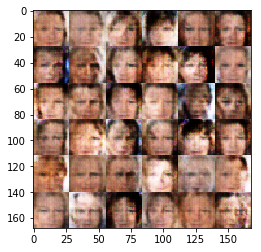

Epoch 1/1... Batch: 900 Discriminator Loss: 0.9263... Generator Loss: 2.0539
Epoch 1/1... Batch: 910 Discriminator Loss: 0.9624... Generator Loss: 1.3611
Epoch 1/1... Batch: 920 Discriminator Loss: 0.7295... Generator Loss: 2.0595
Epoch 1/1... Batch: 930 Discriminator Loss: 1.5289... Generator Loss: 0.8252
Epoch 1/1... Batch: 940 Discriminator Loss: 0.8342... Generator Loss: 1.5403
Epoch 1/1... Batch: 950 Discriminator Loss: 1.0987... Generator Loss: 1.0475
Epoch 1/1... Batch: 960 Discriminator Loss: 0.8054... Generator Loss: 1.1942
Epoch 1/1... Batch: 970 Discriminator Loss: 0.8208... Generator Loss: 1.2872
Epoch 1/1... Batch: 980 Discriminator Loss: 0.7162... Generator Loss: 2.1199
Epoch 1/1... Batch: 990 Discriminator Loss: 0.6233... Generator Loss: 2.3556


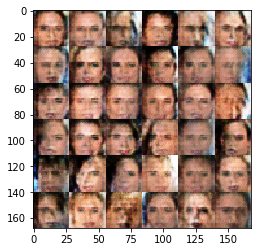

Epoch 1/1... Batch: 1000 Discriminator Loss: 0.7680... Generator Loss: 1.4069
Epoch 1/1... Batch: 1010 Discriminator Loss: 0.9416... Generator Loss: 1.1792
Epoch 1/1... Batch: 1020 Discriminator Loss: 1.1067... Generator Loss: 0.9561
Epoch 1/1... Batch: 1030 Discriminator Loss: 1.0295... Generator Loss: 1.2033
Epoch 1/1... Batch: 1040 Discriminator Loss: 0.7723... Generator Loss: 1.5080
Epoch 1/1... Batch: 1050 Discriminator Loss: 0.6818... Generator Loss: 2.2357
Epoch 1/1... Batch: 1060 Discriminator Loss: 1.5662... Generator Loss: 4.7159
Epoch 1/1... Batch: 1070 Discriminator Loss: 1.0951... Generator Loss: 1.2006
Epoch 1/1... Batch: 1080 Discriminator Loss: 0.8211... Generator Loss: 1.3506
Epoch 1/1... Batch: 1090 Discriminator Loss: 1.0107... Generator Loss: 0.9367


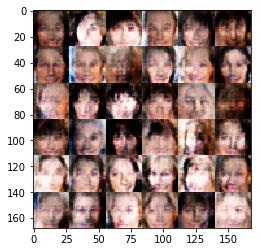

Epoch 1/1... Batch: 1100 Discriminator Loss: 0.7206... Generator Loss: 1.9729
Epoch 1/1... Batch: 1110 Discriminator Loss: 0.6987... Generator Loss: 1.9798
Epoch 1/1... Batch: 1120 Discriminator Loss: 0.8813... Generator Loss: 1.1562
Epoch 1/1... Batch: 1130 Discriminator Loss: 0.6347... Generator Loss: 2.0252
Epoch 1/1... Batch: 1140 Discriminator Loss: 0.8143... Generator Loss: 1.8264
Epoch 1/1... Batch: 1150 Discriminator Loss: 0.7617... Generator Loss: 1.7637
Epoch 1/1... Batch: 1160 Discriminator Loss: 0.9133... Generator Loss: 2.4463
Epoch 1/1... Batch: 1170 Discriminator Loss: 0.8288... Generator Loss: 2.8899
Epoch 1/1... Batch: 1180 Discriminator Loss: 0.8049... Generator Loss: 2.6870
Epoch 1/1... Batch: 1190 Discriminator Loss: 0.6225... Generator Loss: 2.3353


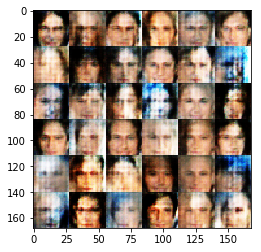

Epoch 1/1... Batch: 1200 Discriminator Loss: 0.5693... Generator Loss: 1.7824
Epoch 1/1... Batch: 1210 Discriminator Loss: 1.0828... Generator Loss: 1.1610
Epoch 1/1... Batch: 1220 Discriminator Loss: 1.0144... Generator Loss: 1.1154
Epoch 1/1... Batch: 1230 Discriminator Loss: 1.0980... Generator Loss: 3.3339
Epoch 1/1... Batch: 1240 Discriminator Loss: 0.7489... Generator Loss: 1.5812
Epoch 1/1... Batch: 1250 Discriminator Loss: 0.9772... Generator Loss: 1.8685
Epoch 1/1... Batch: 1260 Discriminator Loss: 0.7969... Generator Loss: 1.7395
Epoch 1/1... Batch: 1270 Discriminator Loss: 0.7709... Generator Loss: 2.2377
Epoch 1/1... Batch: 1280 Discriminator Loss: 1.3200... Generator Loss: 0.5651
Epoch 1/1... Batch: 1290 Discriminator Loss: 0.8286... Generator Loss: 1.7984


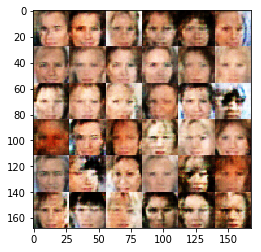

Epoch 1/1... Batch: 1300 Discriminator Loss: 1.4207... Generator Loss: 0.5998
Epoch 1/1... Batch: 1310 Discriminator Loss: 1.1352... Generator Loss: 1.6633
Epoch 1/1... Batch: 1320 Discriminator Loss: 0.8024... Generator Loss: 2.6597
Epoch 1/1... Batch: 1330 Discriminator Loss: 2.1602... Generator Loss: 4.2211
Epoch 1/1... Batch: 1340 Discriminator Loss: 0.7102... Generator Loss: 2.6332
Epoch 1/1... Batch: 1350 Discriminator Loss: 1.2230... Generator Loss: 0.8619
Epoch 1/1... Batch: 1360 Discriminator Loss: 0.9815... Generator Loss: 1.2504
Epoch 1/1... Batch: 1370 Discriminator Loss: 0.7629... Generator Loss: 1.7805
Epoch 1/1... Batch: 1380 Discriminator Loss: 0.9778... Generator Loss: 1.2298
Epoch 1/1... Batch: 1390 Discriminator Loss: 1.0661... Generator Loss: 2.8503


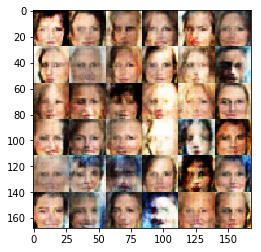

Epoch 1/1... Batch: 1400 Discriminator Loss: 0.5953... Generator Loss: 1.8391
Epoch 1/1... Batch: 1410 Discriminator Loss: 0.7277... Generator Loss: 2.7911
Epoch 1/1... Batch: 1420 Discriminator Loss: 0.8868... Generator Loss: 1.5574
Epoch 1/1... Batch: 1430 Discriminator Loss: 0.7910... Generator Loss: 2.9061
Epoch 1/1... Batch: 1440 Discriminator Loss: 1.2217... Generator Loss: 3.1738
Epoch 1/1... Batch: 1450 Discriminator Loss: 1.4737... Generator Loss: 3.0084
Epoch 1/1... Batch: 1460 Discriminator Loss: 0.8191... Generator Loss: 1.5185
Epoch 1/1... Batch: 1470 Discriminator Loss: 1.0305... Generator Loss: 0.8720
Epoch 1/1... Batch: 1480 Discriminator Loss: 0.6802... Generator Loss: 1.9069
Epoch 1/1... Batch: 1490 Discriminator Loss: 1.1177... Generator Loss: 1.4331


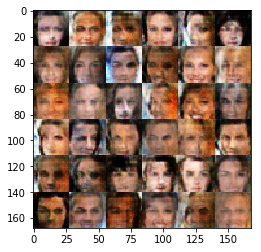

Epoch 1/1... Batch: 1500 Discriminator Loss: 0.7848... Generator Loss: 1.6787
Epoch 1/1... Batch: 1510 Discriminator Loss: 0.9846... Generator Loss: 1.1942
Epoch 1/1... Batch: 1520 Discriminator Loss: 0.7916... Generator Loss: 1.4647
Epoch 1/1... Batch: 1530 Discriminator Loss: 0.9758... Generator Loss: 0.9941
Epoch 1/1... Batch: 1540 Discriminator Loss: 0.7586... Generator Loss: 1.3678
Epoch 1/1... Batch: 1550 Discriminator Loss: 0.9393... Generator Loss: 1.4393
Epoch 1/1... Batch: 1560 Discriminator Loss: 0.9384... Generator Loss: 0.9431
Epoch 1/1... Batch: 1570 Discriminator Loss: 0.7217... Generator Loss: 1.4889
Epoch 1/1... Batch: 1580 Discriminator Loss: 0.6748... Generator Loss: 2.1807
Epoch 1/1... Batch: 1590 Discriminator Loss: 1.0901... Generator Loss: 0.8607


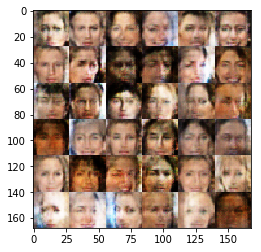

Epoch 1/1... Batch: 1600 Discriminator Loss: 0.9820... Generator Loss: 1.6816
Epoch 1/1... Batch: 1610 Discriminator Loss: 0.8436... Generator Loss: 2.4673
Epoch 1/1... Batch: 1620 Discriminator Loss: 0.6145... Generator Loss: 1.9924
Epoch 1/1... Batch: 1630 Discriminator Loss: 0.7573... Generator Loss: 2.1632
Epoch 1/1... Batch: 1640 Discriminator Loss: 0.8271... Generator Loss: 1.7506
Epoch 1/1... Batch: 1650 Discriminator Loss: 0.7068... Generator Loss: 1.9360
Epoch 1/1... Batch: 1660 Discriminator Loss: 0.8850... Generator Loss: 1.6063
Epoch 1/1... Batch: 1670 Discriminator Loss: 0.8551... Generator Loss: 1.4473
Epoch 1/1... Batch: 1680 Discriminator Loss: 0.8300... Generator Loss: 1.5352
Epoch 1/1... Batch: 1690 Discriminator Loss: 0.6901... Generator Loss: 2.0614


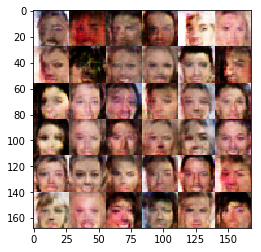

Epoch 1/1... Batch: 1700 Discriminator Loss: 0.5181... Generator Loss: 3.0609
Epoch 1/1... Batch: 1710 Discriminator Loss: 0.6652... Generator Loss: 1.4790
Epoch 1/1... Batch: 1720 Discriminator Loss: 1.6273... Generator Loss: 0.4317
Epoch 1/1... Batch: 1730 Discriminator Loss: 0.9205... Generator Loss: 1.7577
Epoch 1/1... Batch: 1740 Discriminator Loss: 1.0388... Generator Loss: 1.0987
Epoch 1/1... Batch: 1750 Discriminator Loss: 0.5802... Generator Loss: 2.6648
Epoch 1/1... Batch: 1760 Discriminator Loss: 0.8263... Generator Loss: 1.5508
Epoch 1/1... Batch: 1770 Discriminator Loss: 0.9449... Generator Loss: 1.1052
Epoch 1/1... Batch: 1780 Discriminator Loss: 0.8602... Generator Loss: 1.1646
Epoch 1/1... Batch: 1790 Discriminator Loss: 0.9713... Generator Loss: 1.0425


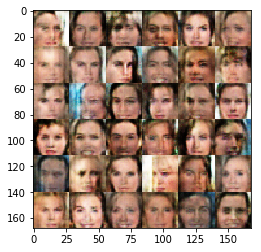

Epoch 1/1... Batch: 1800 Discriminator Loss: 1.0477... Generator Loss: 0.8516
Epoch 1/1... Batch: 1810 Discriminator Loss: 0.7222... Generator Loss: 1.5009
Epoch 1/1... Batch: 1820 Discriminator Loss: 0.7203... Generator Loss: 2.1988
Epoch 1/1... Batch: 1830 Discriminator Loss: 0.7591... Generator Loss: 2.3752
Epoch 1/1... Batch: 1840 Discriminator Loss: 0.7045... Generator Loss: 2.5685
Epoch 1/1... Batch: 1850 Discriminator Loss: 0.8313... Generator Loss: 1.6329
Epoch 1/1... Batch: 1860 Discriminator Loss: 0.7053... Generator Loss: 2.1577
Epoch 1/1... Batch: 1870 Discriminator Loss: 1.6599... Generator Loss: 4.4661
Epoch 1/1... Batch: 1880 Discriminator Loss: 0.9485... Generator Loss: 1.8949
Epoch 1/1... Batch: 1890 Discriminator Loss: 0.8280... Generator Loss: 2.7246


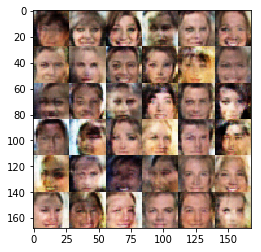

Epoch 1/1... Batch: 1900 Discriminator Loss: 0.6795... Generator Loss: 2.0657
Epoch 1/1... Batch: 1910 Discriminator Loss: 0.9143... Generator Loss: 1.1726
Epoch 1/1... Batch: 1920 Discriminator Loss: 1.0562... Generator Loss: 1.0659
Epoch 1/1... Batch: 1930 Discriminator Loss: 0.9683... Generator Loss: 1.2799
Epoch 1/1... Batch: 1940 Discriminator Loss: 0.8376... Generator Loss: 1.7075
Epoch 1/1... Batch: 1950 Discriminator Loss: 0.8504... Generator Loss: 1.4554
Epoch 1/1... Batch: 1960 Discriminator Loss: 0.7933... Generator Loss: 1.2606
Epoch 1/1... Batch: 1970 Discriminator Loss: 0.7703... Generator Loss: 1.6071
Epoch 1/1... Batch: 1980 Discriminator Loss: 0.7867... Generator Loss: 1.8133
Epoch 1/1... Batch: 1990 Discriminator Loss: 0.7428... Generator Loss: 1.6128


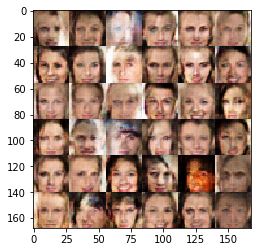

Epoch 1/1... Batch: 2000 Discriminator Loss: 1.3494... Generator Loss: 0.6817
Epoch 1/1... Batch: 2010 Discriminator Loss: 0.9562... Generator Loss: 3.3989
Epoch 1/1... Batch: 2020 Discriminator Loss: 0.8129... Generator Loss: 1.1798
Epoch 1/1... Batch: 2030 Discriminator Loss: 0.6157... Generator Loss: 2.3435
Epoch 1/1... Batch: 2040 Discriminator Loss: 0.6718... Generator Loss: 1.9519
Epoch 1/1... Batch: 2050 Discriminator Loss: 0.7962... Generator Loss: 2.1066
Epoch 1/1... Batch: 2060 Discriminator Loss: 0.7843... Generator Loss: 2.0736
Epoch 1/1... Batch: 2070 Discriminator Loss: 1.1105... Generator Loss: 0.8478
Epoch 1/1... Batch: 2080 Discriminator Loss: 0.9342... Generator Loss: 0.9174
Epoch 1/1... Batch: 2090 Discriminator Loss: 0.6653... Generator Loss: 2.3742


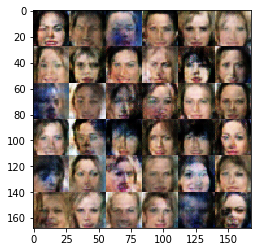

Epoch 1/1... Batch: 2100 Discriminator Loss: 0.7070... Generator Loss: 2.4036
Epoch 1/1... Batch: 2110 Discriminator Loss: 0.6706... Generator Loss: 1.4131
Epoch 1/1... Batch: 2120 Discriminator Loss: 0.8182... Generator Loss: 1.9242
Epoch 1/1... Batch: 2130 Discriminator Loss: 1.0513... Generator Loss: 2.4282
Epoch 1/1... Batch: 2140 Discriminator Loss: 0.8434... Generator Loss: 2.7306
Epoch 1/1... Batch: 2150 Discriminator Loss: 0.8847... Generator Loss: 2.4970
Epoch 1/1... Batch: 2160 Discriminator Loss: 0.7845... Generator Loss: 1.6704
Epoch 1/1... Batch: 2170 Discriminator Loss: 0.9886... Generator Loss: 1.2262
Epoch 1/1... Batch: 2180 Discriminator Loss: 1.0001... Generator Loss: 1.0554
Epoch 1/1... Batch: 2190 Discriminator Loss: 1.0090... Generator Loss: 2.9972


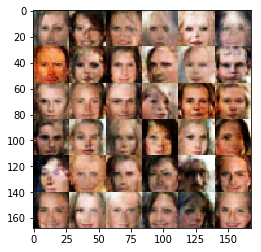

Epoch 1/1... Batch: 2200 Discriminator Loss: 0.8463... Generator Loss: 1.9995
Epoch 1/1... Batch: 2210 Discriminator Loss: 0.8843... Generator Loss: 1.3050
Epoch 1/1... Batch: 2220 Discriminator Loss: 0.7733... Generator Loss: 1.2464
Epoch 1/1... Batch: 2230 Discriminator Loss: 0.9042... Generator Loss: 1.2705
Epoch 1/1... Batch: 2240 Discriminator Loss: 1.4941... Generator Loss: 3.5875
Epoch 1/1... Batch: 2250 Discriminator Loss: 0.8097... Generator Loss: 1.4011
Epoch 1/1... Batch: 2260 Discriminator Loss: 0.7666... Generator Loss: 1.5582
Epoch 1/1... Batch: 2270 Discriminator Loss: 1.2610... Generator Loss: 0.6991
Epoch 1/1... Batch: 2280 Discriminator Loss: 0.6749... Generator Loss: 1.5602
Epoch 1/1... Batch: 2290 Discriminator Loss: 0.8028... Generator Loss: 2.0998


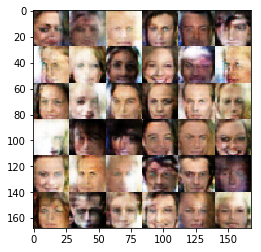

Epoch 1/1... Batch: 2300 Discriminator Loss: 0.6809... Generator Loss: 2.1750
Epoch 1/1... Batch: 2310 Discriminator Loss: 0.9674... Generator Loss: 1.0707
Epoch 1/1... Batch: 2320 Discriminator Loss: 0.8422... Generator Loss: 1.6000
Epoch 1/1... Batch: 2330 Discriminator Loss: 0.7168... Generator Loss: 2.4485
Epoch 1/1... Batch: 2340 Discriminator Loss: 1.4539... Generator Loss: 0.7826
Epoch 1/1... Batch: 2350 Discriminator Loss: 1.1409... Generator Loss: 1.0915
Epoch 1/1... Batch: 2360 Discriminator Loss: 0.9259... Generator Loss: 1.3194
Epoch 1/1... Batch: 2370 Discriminator Loss: 1.3942... Generator Loss: 4.9267
Epoch 1/1... Batch: 2380 Discriminator Loss: 0.9109... Generator Loss: 2.5670
Epoch 1/1... Batch: 2390 Discriminator Loss: 0.7370... Generator Loss: 1.1765


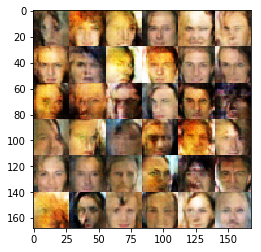

Epoch 1/1... Batch: 2400 Discriminator Loss: 0.9970... Generator Loss: 1.6265
Epoch 1/1... Batch: 2410 Discriminator Loss: 0.7155... Generator Loss: 1.5707
Epoch 1/1... Batch: 2420 Discriminator Loss: 1.1585... Generator Loss: 0.8773
Epoch 1/1... Batch: 2430 Discriminator Loss: 1.4986... Generator Loss: 0.5299
Epoch 1/1... Batch: 2440 Discriminator Loss: 1.0150... Generator Loss: 1.1547
Epoch 1/1... Batch: 2450 Discriminator Loss: 0.6900... Generator Loss: 2.1656
Epoch 1/1... Batch: 2460 Discriminator Loss: 0.6278... Generator Loss: 2.0678
Epoch 1/1... Batch: 2470 Discriminator Loss: 0.9329... Generator Loss: 1.1239
Epoch 1/1... Batch: 2480 Discriminator Loss: 0.8129... Generator Loss: 3.0417
Epoch 1/1... Batch: 2490 Discriminator Loss: 0.9497... Generator Loss: 1.0150


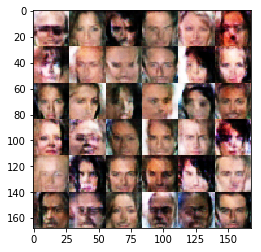

Epoch 1/1... Batch: 2500 Discriminator Loss: 0.7840... Generator Loss: 3.3069
Epoch 1/1... Batch: 2510 Discriminator Loss: 0.7352... Generator Loss: 2.5800
Epoch 1/1... Batch: 2520 Discriminator Loss: 0.6791... Generator Loss: 2.2199
Epoch 1/1... Batch: 2530 Discriminator Loss: 1.9209... Generator Loss: 0.3327
Epoch 1/1... Batch: 2540 Discriminator Loss: 0.6759... Generator Loss: 1.8441
Epoch 1/1... Batch: 2550 Discriminator Loss: 0.8630... Generator Loss: 1.5764
Epoch 1/1... Batch: 2560 Discriminator Loss: 0.8769... Generator Loss: 1.6895
Epoch 1/1... Batch: 2570 Discriminator Loss: 0.8580... Generator Loss: 1.8694
Epoch 1/1... Batch: 2580 Discriminator Loss: 0.6901... Generator Loss: 2.3488
Epoch 1/1... Batch: 2590 Discriminator Loss: 1.2728... Generator Loss: 1.0050


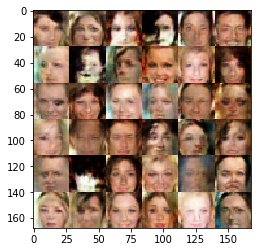

Epoch 1/1... Batch: 2600 Discriminator Loss: 0.8823... Generator Loss: 1.2500
Epoch 1/1... Batch: 2610 Discriminator Loss: 0.6354... Generator Loss: 2.3578
Epoch 1/1... Batch: 2620 Discriminator Loss: 0.6064... Generator Loss: 2.4597
Epoch 1/1... Batch: 2630 Discriminator Loss: 0.7309... Generator Loss: 1.8888
Epoch 1/1... Batch: 2640 Discriminator Loss: 0.7001... Generator Loss: 1.7981
Epoch 1/1... Batch: 2650 Discriminator Loss: 0.6183... Generator Loss: 1.8366
Epoch 1/1... Batch: 2660 Discriminator Loss: 1.0534... Generator Loss: 3.7400
Epoch 1/1... Batch: 2670 Discriminator Loss: 0.7556... Generator Loss: 1.9761
Epoch 1/1... Batch: 2680 Discriminator Loss: 0.8590... Generator Loss: 1.3142
Epoch 1/1... Batch: 2690 Discriminator Loss: 0.7953... Generator Loss: 1.5601


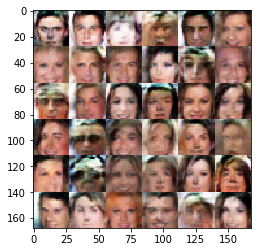

Epoch 1/1... Batch: 2700 Discriminator Loss: 0.9652... Generator Loss: 2.8433
Epoch 1/1... Batch: 2710 Discriminator Loss: 1.1267... Generator Loss: 2.9163
Epoch 1/1... Batch: 2720 Discriminator Loss: 0.8800... Generator Loss: 1.2247
Epoch 1/1... Batch: 2730 Discriminator Loss: 0.5940... Generator Loss: 1.9384
Epoch 1/1... Batch: 2740 Discriminator Loss: 0.6541... Generator Loss: 1.6177
Epoch 1/1... Batch: 2750 Discriminator Loss: 1.2141... Generator Loss: 3.7953
Epoch 1/1... Batch: 2760 Discriminator Loss: 0.8204... Generator Loss: 1.5936
Epoch 1/1... Batch: 2770 Discriminator Loss: 1.1939... Generator Loss: 0.8393
Epoch 1/1... Batch: 2780 Discriminator Loss: 0.8819... Generator Loss: 1.1861
Epoch 1/1... Batch: 2790 Discriminator Loss: 0.8082... Generator Loss: 3.2281


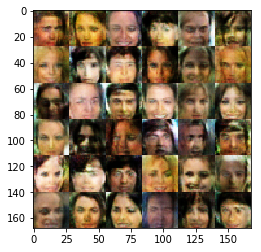

Epoch 1/1... Batch: 2800 Discriminator Loss: 0.7176... Generator Loss: 3.0026
Epoch 1/1... Batch: 2810 Discriminator Loss: 0.6200... Generator Loss: 3.0487
Epoch 1/1... Batch: 2820 Discriminator Loss: 0.7407... Generator Loss: 1.7542
Epoch 1/1... Batch: 2830 Discriminator Loss: 0.7301... Generator Loss: 2.7298
Epoch 1/1... Batch: 2840 Discriminator Loss: 1.5307... Generator Loss: 4.3599
Epoch 1/1... Batch: 2850 Discriminator Loss: 0.6095... Generator Loss: 2.2583
Epoch 1/1... Batch: 2860 Discriminator Loss: 0.6907... Generator Loss: 2.6159
Epoch 1/1... Batch: 2870 Discriminator Loss: 0.8689... Generator Loss: 1.3177
Epoch 1/1... Batch: 2880 Discriminator Loss: 1.8452... Generator Loss: 4.5930
Epoch 1/1... Batch: 2890 Discriminator Loss: 1.0549... Generator Loss: 3.1844


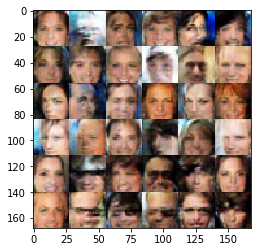

Epoch 1/1... Batch: 2900 Discriminator Loss: 0.7868... Generator Loss: 2.0500
Epoch 1/1... Batch: 2910 Discriminator Loss: 0.8112... Generator Loss: 1.9276
Epoch 1/1... Batch: 2920 Discriminator Loss: 1.0510... Generator Loss: 0.8680
Epoch 1/1... Batch: 2930 Discriminator Loss: 0.6880... Generator Loss: 1.8877
Epoch 1/1... Batch: 2940 Discriminator Loss: 0.8598... Generator Loss: 1.4118
Epoch 1/1... Batch: 2950 Discriminator Loss: 1.1373... Generator Loss: 3.5130
Epoch 1/1... Batch: 2960 Discriminator Loss: 0.7815... Generator Loss: 1.8545
Epoch 1/1... Batch: 2970 Discriminator Loss: 1.3935... Generator Loss: 4.5171
Epoch 1/1... Batch: 2980 Discriminator Loss: 0.8835... Generator Loss: 0.9149
Epoch 1/1... Batch: 2990 Discriminator Loss: 0.6674... Generator Loss: 2.2661


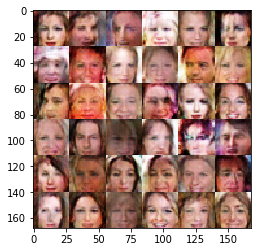

Epoch 1/1... Batch: 3000 Discriminator Loss: 1.0443... Generator Loss: 0.7498
Epoch 1/1... Batch: 3010 Discriminator Loss: 0.6402... Generator Loss: 2.3618
Epoch 1/1... Batch: 3020 Discriminator Loss: 1.1959... Generator Loss: 0.8060
Epoch 1/1... Batch: 3030 Discriminator Loss: 0.7765... Generator Loss: 1.9288
Epoch 1/1... Batch: 3040 Discriminator Loss: 0.8051... Generator Loss: 1.4398
Epoch 1/1... Batch: 3050 Discriminator Loss: 0.8029... Generator Loss: 2.2038
Epoch 1/1... Batch: 3060 Discriminator Loss: 0.9864... Generator Loss: 0.9257
Epoch 1/1... Batch: 3070 Discriminator Loss: 1.1992... Generator Loss: 0.6908
Epoch 1/1... Batch: 3080 Discriminator Loss: 0.8793... Generator Loss: 1.0205
Epoch 1/1... Batch: 3090 Discriminator Loss: 0.8871... Generator Loss: 2.8047


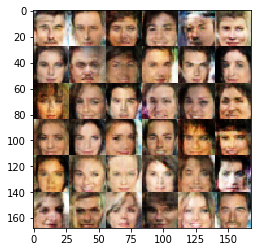

Epoch 1/1... Batch: 3100 Discriminator Loss: 0.7734... Generator Loss: 1.2308
Epoch 1/1... Batch: 3110 Discriminator Loss: 0.9134... Generator Loss: 1.2209
Epoch 1/1... Batch: 3120 Discriminator Loss: 0.7068... Generator Loss: 2.4206
Epoch 1/1... Batch: 3130 Discriminator Loss: 0.9273... Generator Loss: 1.4172
Epoch 1/1... Batch: 3140 Discriminator Loss: 0.5110... Generator Loss: 2.3980
Epoch 1/1... Batch: 3150 Discriminator Loss: 0.8449... Generator Loss: 1.4868
Epoch 1/1... Batch: 3160 Discriminator Loss: 1.1057... Generator Loss: 0.8077


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.